In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from keras import layers,Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import *
from tensorflow.keras.optimizers import Adam

In [3]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np
pixels=train.iloc[:,1:785]
labels=train.iloc[:,0]
pixels=np.array(pixels)
digit=pixels.reshape(len(pixels),28,28,1)

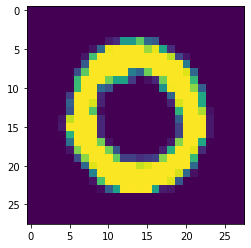

In [6]:
import matplotlib.pyplot as plt
plt.imshow(digit[1])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(digit,labels,test_size=0.2)
X_train.shape

(33600, 28, 28, 1)

In [8]:
model=Sequential()
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

2023-02-14 14:41:03.073342: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(X_train,Y_train,epochs=44)

2023-02-14 14:41:03.718052: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/44
1050/1050 [==============================] - 12s 11ms/step - loss: 2.1756 - accuracy: 0.5238
Epoch 2/44
1050/1050 [==============================] - 12s 11ms/step - loss: 0.4619 - accuracy: 0.8541
Epoch 3/44
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3025 - accuracy: 0.9076
Epoch 4/44
1050/1050 [==============================] - 11s 10ms/step - loss: 0.2386 - accuracy: 0.9309
Epoch 5/44
1050/1050 [==============================] - 12s 11ms/step - loss: 0.2015 - accuracy: 0.9411
Epoch 6/44
1050/1050 [==============================] - 11s 10ms/step - loss: 0.1711 - accuracy: 0.9495
Epoch 7/44
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1489 - accuracy: 0.9561
Epoch 8/44
1050/1050 [==============================] - 11s 11ms/step - loss: 0.1427 - accuracy: 0.9585
Epoch 9/44
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1331 - accuracy: 0.9612
Epoch 10/44
1050/1050 [==============================] - 10s 10m

In [11]:
y_pred=model.predict(X_valid)
y_predict=[np.argmax(pred) for pred in y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(Y_valid,y_predict)

0.9891666666666666

In [12]:
test_x=np.array(test)
test_x=test_x.reshape(len(test_x),28,28,1)
test_pred=model.predict(test_x)
test_predict=[np.argmax(pred) for pred in test_pred]

In [13]:
submission=pd.DataFrame()
image_id=[i for i in range(1,len(test_x)+1)]
submission['ImageId']=image_id
submission['Label']=test_predict
submission.head(3)

,ImageId,Label
0,1,2
1,2,0
2,3,9


In [14]:
submission.to_csv('submission.csv',index=False)